In [36]:
# 데이터 프레임화 및 시각화 준비 작업
import pymysql as m
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)

In [ ]:
# 각 컴퓨터로 읽을 때 고려해야할 사항
# 0. CSV 파일 읽을때 각자 데이터 위치 수정
# 1. 각자 MYSQL 비밀번호 작성해야함
# 2. MYSQL 상에 만든 / 1) database 이름 2)table 이름 수정

In [3]:
# SQL 연동
con = m.connect(host='localhost', user='root', password='7751', charset='utf8')
cur = con.cursor()

In [8]:
# 1) 데이터 기간내 국가별 방문자수(19.1~20.4)
df1 = pd.read_csv("PROJECT/01.nation_viitor.csv")
df1_sample = df1.drop(['Unnamed: 0'], axis=1)
df1_sample

,국가,방문자 수
0,China,6236504
1,Japan,3695581
2,Taiwan,1424629
3,USA,1170719
4,Hong Kong,783159
5,Thailand,644523
6,Vietnam,624921
7,Phillipines,560570
8,Malaysia,455722
9,Russia,400628


In [10]:
# 1-1) 국가별 방문자수 top5
df1_top5 = df1_sample.head()
df1_top5

,국가,방문자 수
0,China,6236504
1,Japan,3695581
2,Taiwan,1424629
3,USA,1170719
4,Hong Kong,783159


In [94]:
df1_top5_reduced = df1_top5['방문자 수']
df1_top5_reduced = df1_top5_reduced//10000
df1_top5_reduced

0    623
1    369
2    142
3    117
4     78
Name: 방문자 수, dtype: int64

In [97]:
df1_top5_temp = df1_top5['국가']
df1_top5_temp

0        China
1        Japan
2       Taiwan
3          USA
4    Hong Kong
Name: 국가, dtype: object

In [100]:
df_re = pd.concat([df1_top5_temp, df1_top5_reduced], axis=1)
df_re

,국가,방문자 수
0,China,623
1,Japan,369
2,Taiwan,142
3,USA,117
4,Hong Kong,78


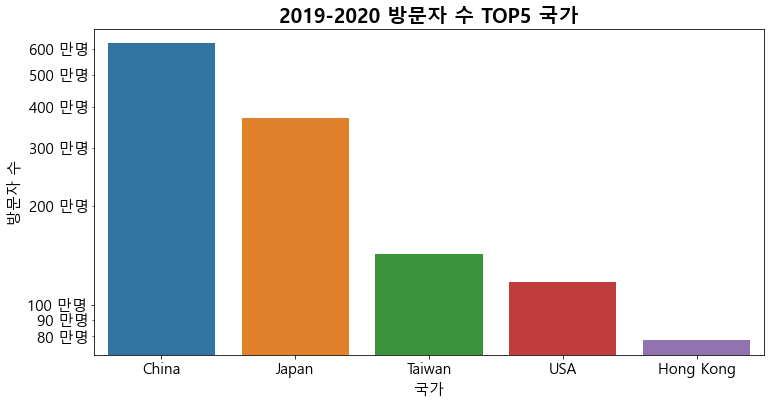

In [101]:
# 1-2) 시각화 // ?
plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = 15
plt.title('2019-2020 방문자 수 TOP5 국가',fontsize = 20 , fontweight = 'bold')
sns.barplot(x="국가", y="방문자 수", data=df_re, log = True)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i 만명'))
plt.gca().yaxis.set_minor_formatter(mticker.FormatStrFormatter('%i 만명'))
plt.show()

In [38]:
# 2) 방문자 수 상위 5개 국가가 차지하는 방문자 수 비율

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(방문자_수) / (SELECT SUM(방문자_수) FROM project_csv)*100 '나라별 비율'
FROM project_csv
WHERE 국가 IN ('china','Japan','Taiwan','USA','Hong Kong')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_visitorT5 = pd.DataFrame(res)
con.close()
df_visitorT5

col = ['국가', '방문자 수 비율']
df_visitorT5 = pd.DataFrame(res, columns =col)
df_visitorT5

,국가,방문자 수 비율
0,China,32.5144
1,Japan,19.2671
2,Taiwan,7.4274
3,USA,6.1036
4,Hong Kong,4.0830


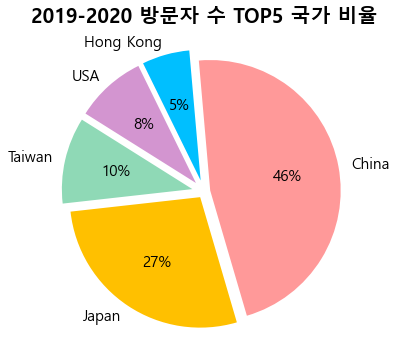

In [58]:
# 2-1) 시각화
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
explode = [0.05, 0.05, 0.09, 0.09, 0.09]
top5_ratio = df_visitorT5.head(5)
data = top5_ratio['방문자 수 비율']
labels = top5_ratio['국가']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.title('2019-2020 방문자 수 TOP5 국가 비율',  fontsize = 20 , fontweight = 'bold')
plt.show()

In [62]:
# 3) TOP 5 국가 방문 목적 비율
df2 = pd.read_csv("PROJECT/03.TOP5_nation_purpose_ratio.csv")
df2_sample = df2.drop(['Unnamed: 0'], axis=1)
df2_sample

,국가,관광,사업,공무,유학
0,Taiwan,98.2479,0.0810,0.0155,0.3974
1,Hong Kong,97.8488,0.0977,0.0066,0.4196
2,Japan,97.0299,0.7629,0.0613,0.4420
3,China,80.5216,0.7170,0.0790,4.3149
4,USA,75.6001,0.4654,3.5476,0.5463


<Figure size 1152x432 with 0 Axes>

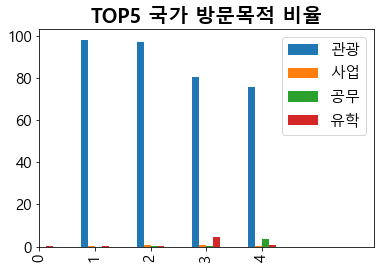

In [105]:
# 3-1) 시각화
plt.figure(figsize=(16, 6))
plt.rcParams['font.size'] = 15

df2_sample.plot.bar()
plt.xlim(0,6)
plt.title('TOP5 국가 방문목적 비율',fontsize = 20 , fontweight = 'bold')
plt.show()

In [66]:
# 관광 비중이 높아 방문 목적별 TOP5 국가를 선정함

In [70]:
# 4) 관광 목적 TOP 5 / 1. 중국 2. 일본 3. 대만 4. 미국 5. 홍콩

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(관광)/(SELECT SUM(관광) FROM project_csv)*100 관광비율
FROM project_csv
WHERE 국가 IN ('China', 'Japan', 'Taiwan', 'USA', 'Hong Kong')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_purT5 = pd.DataFrame(res)
con.close()

col = ['국가', '관광 비율']
df_purT5 = pd.DataFrame(res, columns =col)
df_purT5

# 'others' 생성 코드

sum_of_etc = 100.0-float(df_purT5["관광 비율"].sum())              
sum_of_etc
data ={"국가": "Others", "관광 비율":sum_of_etc}
df_purT5 = df_purT5.append(data,  ignore_index=True)
df_purT5

,국가,관광 비율
0,China,32.0197
1,Japan,22.8640
2,Taiwan,8.9246
3,USA,5.6434
4,Hong Kong,4.8862
5,Others,25.6621


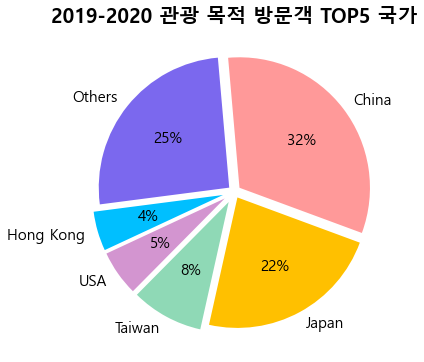

In [78]:
# 4-1) 시각화
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
explode = [0.05, 0.05, 0.09, 0.09, 0.09, 0.05]
data = df_purT5['관광 비율']
labels = df_purT5['국가']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.title('2019-2020 관광 목적 방문객 TOP5 국가',  fontsize = 20 , fontweight = 'bold')
plt.show()

In [84]:
# 5) 사업 목적 TOP 5 / 1. 중국 2. 인도 3. 일본 4. 베트남 5. 아프리카 대륙
df3 = pd.read_csv("PROJECT/05.business_TOP5.csv")
df3_sample = df3.drop(['Unnamed: 0'], axis=1)
df3_sample

# 'others' 생성 코드
sum_etc = 100.0-float(df3_sample["사업 비율"].sum())
sum_etc
df3['사업 비율'].sum()
data ={"국가": "Others", "사업 비율":sum_etc}
df3_a = df3_sample.append(data,  ignore_index=True)
df3_a

,국가,사업 비율
0,China,22.6964
1,India,19.0170
2,Japan,14.3104
3,Vietnam,7.2481
4,Africa others,5.3726
5,Others,31.3555


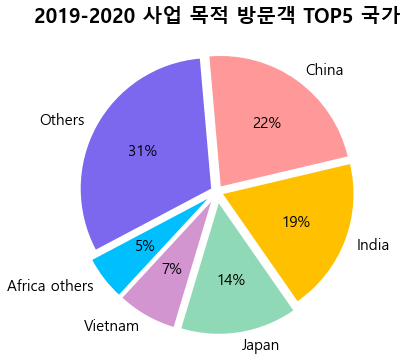

In [108]:
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
plt.title('2019-2020 사업 목적 방문객 TOP5 국가',  fontsize = 20 , fontweight = 'bold')
labels = df3_a['국가']
data = df3_a['사업 비율']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.show()

In [111]:
# 6) 공무 목적 TOP 5 / 1. 미국 2. 중국 3. 몽골 4. 베트남 5. 태국 

con = m.connect(host='localhost', user='root', password='7751', db ='visitor_of_korea', charset='utf8')
cur = con.cursor()
q = """SELECT 국가, SUM(공무)/(SELECT SUM(공무) FROM project_csv)*100 공무비율
FROM project_csv
WHERE 국가 IN ('USA', 'China', 'Vietnam', 'Mongolia', 'Thailand')
GROUP BY 1
ORDER BY 2 DESC
"""
cur.execute(q)                        
res = cur.fetchall()                  
df_officeT5 = pd.DataFrame(res)
con.close()

col = ['국가', '공무 비율']
df_officeT5 = pd.DataFrame(res, columns =col)
df_officeT5

# 'others' 생성 코드
sum_of_etc = 100.0-float(df_officeT5["공무 비율"].sum())              
sum_of_etc

data ={"국가": "Others", "공무 비율":sum_of_etc}

df_officeT5 = df_officeT5.append(data,  ignore_index=True)
df_officeT5

,국가,공무 비율
0,USA,49.2453
1,China,5.8443
2,Mongolia,5.2467
3,Vietnam,5.1957
4,Thailand,4.9669
5,Others,29.5011


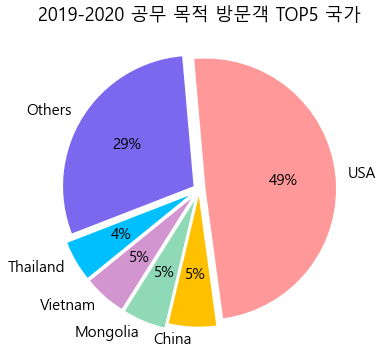

In [124]:
# 6-1) 시각화
plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
data = df_officeT5['공무 비율']
labels = df_officeT5['국가']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.title('2019-2020 공무 목적 방문객 TOP5 국가')
plt.show()

In [120]:
# 7) 유학 목적 TOP 5 / 1. 중국 2. 베트남 3. 일본 4. 몽골 5.우즈벡 

df4 = pd.read_csv("PROJECT/07.studying_overseas_TOP5.csv")

df4_sample = df4.drop(['Unnamed: 0'], axis=1)
df4_sample

sum_etc = 100.0-float(df4_sample["유학 비율"].sum())
sum_etc

data = {"국가" : "Others", "유학 비율" : sum_etc}
df4_a = df4_sample.append(data, ignore_index=True)
df4_a

,국가,유학 비율
0,China,59.6831
1,Vietnam,14.4862
2,Japan,3.6224
3,Mongolia,2.3685
4,Uzbekistan,1.9759
5,Others,17.8639


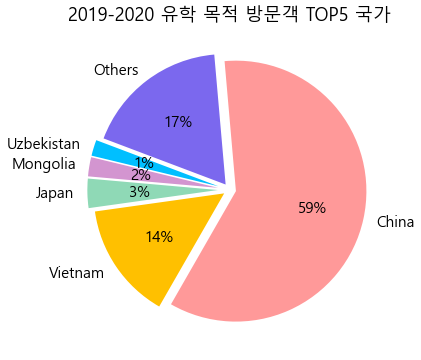

In [125]:
# 7-1) 시각화 

plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15
labels = df4_a['국가']
data = df4_a['유학 비율']
explode = [0.05, 0.05, 0.09, 0.09, 0.09, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#00BFFF', '#7B68EE']
plt.pie(data, labels = labels, autopct = '%.i%%', startangle=95, counterclock=False, colors=colors, explode = explode)
plt.title('2019-2020 유학 목적 방문객 TOP5 국가')
plt.show()